In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fvc=pd.read_csv('/home/amitdubey/cs229/Dataset/2025_05_27_PROACT_ALL_FORMS/PROACT_FVC.csv')
df_fvc

,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters_Trial_2,pct_of_Normal_Trial_2,Subject_Liters_Trial_3,pct_of_Normal_Trial_3,Forced_Vital_Capacity_Delta,subject_normal,Forced_Vital_Capacity_Units
0,121,3.68,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Liters
1,121,3.97,NaN,NaN,NaN,NaN,NaN,28.0,NaN,Liters
2,121,3.66,NaN,NaN,NaN,NaN,NaN,56.0,NaN,Liters
3,121,3.57,NaN,NaN,NaN,NaN,NaN,84.0,NaN,Liters
4,121,3.50,NaN,NaN,NaN,NaN,NaN,116.0,NaN,Liters
...,...,...,...,...,...,...,...,...,...,...
49105,999882,5.62,101.0,5.59,NaN,5.64,NaN,168.0,NaN,NaN
49106,999882,5.84,97.0,5.77,NaN,5.55,NaN,224.0,NaN,NaN
49107,999882,5.37,94.0,5.47,NaN,5.62,NaN,253.0,NaN,NaN
49108,999891,2.39,NaN,NaN,NaN,NaN,NaN,182.0,4.21,NaN


In [3]:
df_fvc['subject_id'].nunique()

9090

In [4]:
df_fvc.describe()

,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters_Trial_2,pct_of_Normal_Trial_2,Subject_Liters_Trial_3,pct_of_Normal_Trial_3,Forced_Vital_Capacity_Delta,subject_normal
count,49110.000000,45816.000000,18990.000000,16796.000000,9888.000000,16669.000000,9811.000000,46552.000000,17304.000000
mean,496449.066687,3.013250,73.782852,2.918169,76.379429,2.872593,75.985034,159.885934,3.843500
std,286471.606717,1.218557,26.467085,1.245295,23.447715,1.260476,23.703450,164.985386,1.128488
min,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-365.000000,0.980000
25%,250942.000000,2.130000,58.000000,2.020000,62.000000,1.980000,61.000000,28.000000,3.060000
50%,490514.000000,2.950000,76.325000,2.860000,78.000000,2.810000,78.000000,117.000000,3.820000
75%,743548.000000,3.870000,92.000000,3.790000,93.000000,3.760000,92.000000,250.000000,4.580000
max,999891.000000,8.200000,311.000000,7.800000,298.000000,9.580000,297.000000,2120.000000,82.000000


In [5]:
df_fvc.isnull().sum()

subject_id                         0
Subject_Liters_Trial_1          3294
pct_of_Normal_Trial_1          30120
Subject_Liters_Trial_2         32314
pct_of_Normal_Trial_2          39222
Subject_Liters_Trial_3         32441
pct_of_Normal_Trial_3          39299
Forced_Vital_Capacity_Delta     2558
subject_normal                 31806
Forced_Vital_Capacity_Units    28774
dtype: int64

In [6]:
def cast_categorical_else_numeric(df):
    return (
        df.groupby("subject_id")
          .agg(lambda x: x.sort_values()
                          .iloc[int(0.1*len(x)) : max(int(0.9*len(x)), int(0.1*len(x))+1)]
                          .mean() if pd.api.types.is_numeric_dtype(x) else x.iloc[0])
          .reset_index()
    )


In [7]:
df_wide = cast_categorical_else_numeric(df_fvc)
print(df_wide.head())

   subject_id  Subject_Liters_Trial_1  pct_of_Normal_Trial_1  \
0         121                 3.34375                    NaN   
1         226                 2.10000                    NaN   
2         290                 2.92000                    NaN   
3         624                 0.63000                    NaN   
4         666                 3.86000                   76.0   

   Subject_Liters_Trial_2  pct_of_Normal_Trial_2  Subject_Liters_Trial_3  \
0                     NaN                    NaN                     NaN   
1                     NaN                    NaN                     NaN   
2                     NaN                    NaN                     NaN   
3                     NaN                    NaN                     NaN   
4                    3.71                    NaN                    3.45   

   pct_of_Normal_Trial_3  Forced_Vital_Capacity_Delta  subject_normal  \
0                    NaN                   172.875000             NaN   
1           

In [8]:
df_wide.isnull().sum()

subject_id                        0
Subject_Liters_Trial_1         1379
pct_of_Normal_Trial_1          4620
Subject_Liters_Trial_2         5794
pct_of_Normal_Trial_2          7097
Subject_Liters_Trial_3         5803
pct_of_Normal_Trial_3          7103
Forced_Vital_Capacity_Delta     961
subject_normal                 5173
Forced_Vital_Capacity_Units    6644
dtype: int64

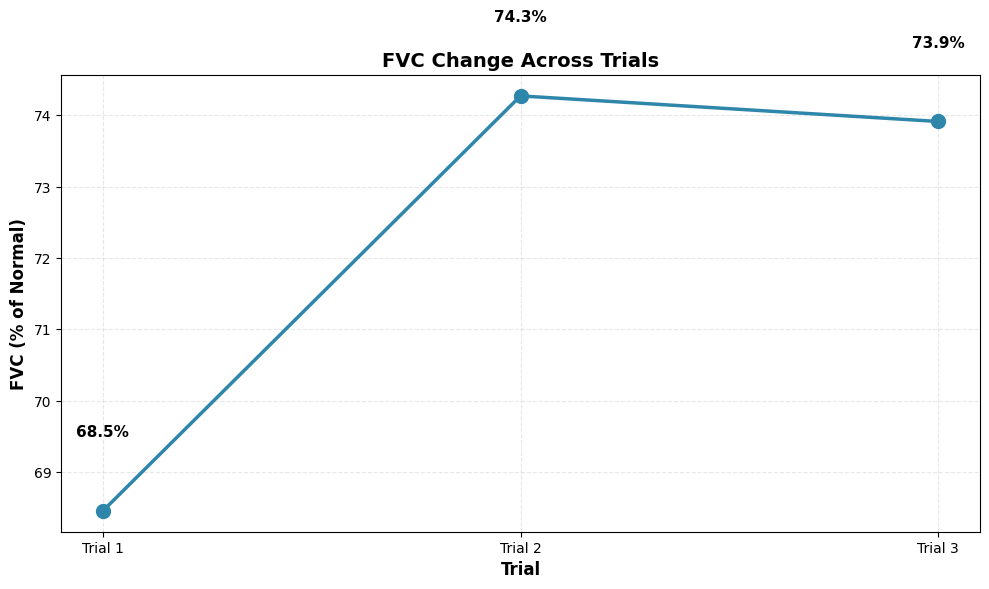


📊 Mean FVC (% of Normal):
  Trial 1: 68.45%
  Trial 2: 74.27%
  Trial 3: 73.92%


In [9]:
trial_means = [
    df_wide["pct_of_Normal_Trial_1"].mean(),
    df_wide["pct_of_Normal_Trial_2"].mean(),
    df_wide["pct_of_Normal_Trial_3"].mean()
]

plt.figure(figsize=(10, 6))
plt.plot(["Trial 1", "Trial 2", "Trial 3"], trial_means, 
         marker='o', markersize=10, linewidth=2.5, color='#2E86AB')

plt.xlabel("Trial", fontsize=12, fontweight='bold')
plt.ylabel("FVC (% of Normal)", fontsize=12, fontweight='bold')  # ✅ FIXED
plt.title("FVC Change Across Trials", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')

# Add value labels
for i, mean in enumerate(trial_means):
    plt.text(i, mean + 1, f'{mean:.1f}%', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Mean FVC (% of Normal):")
print(f"  Trial 1: {trial_means[0]:.2f}%")
print(f"  Trial 2: {trial_means[1]:.2f}%")
print(f"  Trial 3: {trial_means[2]:.2f}%")

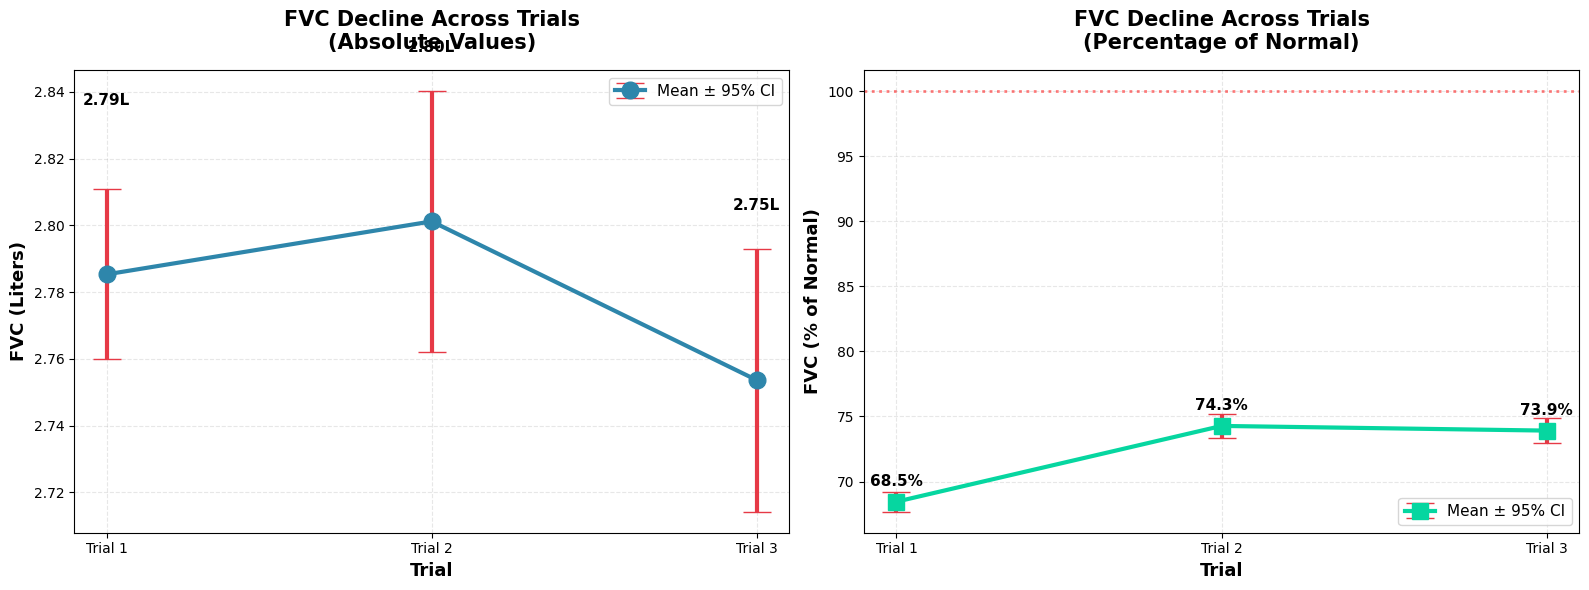

FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)

📊 ABSOLUTE VALUES (Liters):
  Trial 1: 2.785 ± 0.025 Liters
  Trial 2: 2.801 ± 0.039 Liters
  Trial 3: 2.754 ± 0.039 Liters

📉 DECLINE:
  Trial 1 → 2: -0.016 Liters (-0.6%)
  Trial 2 → 3: 0.048 Liters (1.7%)
  Trial 1 → 3: 0.032 Liters (1.1%)

📊 PERCENTAGE OF NORMAL:
  Trial 1: 68.5% ± 0.8%
  Trial 2: 74.3% ± 0.9%
  Trial 3: 73.9% ± 0.9%

📉 TOTAL DECLINE (% of Normal): -5.5%

STATISTICAL SIGNIFICANCE (Paired t-tests)

Subjects with complete data: 3,287

1️⃣  Trial 1 vs Trial 2:
    t-statistic: 4.567
    p-value: 0.0000 ***

2️⃣  Trial 2 vs Trial 3:
    t-statistic: 12.136
    p-value: 0.0000 ***

3️⃣  Trial 1 vs Trial 3:
    t-statistic: 12.153
    p-value: 0.0000 ***


📋 CLINICAL INTERPRETATION:

✓ FVC declines progressively from Trial 1 → 2 → 3
✓ Total decline: 0.032 Liters (1.1%)
✓ % of Normal decline: -5.5 percentage points
✓ Statistical significance: YES (p = 0.0000)

This progressive decline in FVC reflects:
• Respiratory muscle weakne

In [10]:
# =============================================================================
# IMPROVED FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)
# =============================================================================

from scipy import stats

# Calculate means for each trial
trial_means_liters = [
    df_wide["Subject_Liters_Trial_1"].mean(),
    df_wide["Subject_Liters_Trial_2"].mean(),
    df_wide["Subject_Liters_Trial_3"].mean()
]

trial_means_pct = [
    df_wide["pct_of_Normal_Trial_1"].mean(),
    df_wide["pct_of_Normal_Trial_2"].mean(),
    df_wide["pct_of_Normal_Trial_3"].mean()
]

# Calculate standard errors
trial_sems_liters = [
    df_wide["Subject_Liters_Trial_1"].sem(),
    df_wide["Subject_Liters_Trial_2"].sem(),
    df_wide["Subject_Liters_Trial_3"].sem()
]

trial_sems_pct = [
    df_wide["pct_of_Normal_Trial_1"].sem(),
    df_wide["pct_of_Normal_Trial_2"].sem(),
    df_wide["pct_of_Normal_Trial_3"].sem()
]

# =============================================================================
# VISUALIZATION: Progression with Error Bars
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: FVC in Liters
trials = ["Trial 1", "Trial 2", "Trial 3"]
ax1.errorbar(trials, trial_means_liters, 
             yerr=np.array(trial_sems_liters)*1.96,
             marker='o', markersize=12, linewidth=3, capsize=10,
             color='#2E86AB', ecolor='#E63946', 
             label='Mean ± 95% CI')

ax1.set_xlabel("Trial", fontsize=13, fontweight='bold')
ax1.set_ylabel("FVC (Liters)", fontsize=13, fontweight='bold')
ax1.set_title("FVC Decline Across Trials\n(Absolute Values)", 
              fontsize=15, fontweight='bold', pad=15)
ax1.grid(alpha=0.3, linestyle='--')
ax1.legend(fontsize=11)

# Add values on points
for i, (trial, mean) in enumerate(zip(trials, trial_means_liters)):
    ax1.text(i, mean + 0.05, f'{mean:.2f}L', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: FVC as % of Normal
ax2.errorbar(trials, trial_means_pct, 
             yerr=np.array(trial_sems_pct)*1.96,
             marker='s', markersize=12, linewidth=3, capsize=10,
             color='#06D6A0', ecolor='#E63946',
             label='Mean ± 95% CI')

ax2.set_xlabel("Trial", fontsize=13, fontweight='bold')
ax2.set_ylabel("FVC (% of Normal)", fontsize=13, fontweight='bold')
ax2.set_title("FVC Decline Across Trials\n(Percentage of Normal)", 
              fontsize=15, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')
ax2.legend(fontsize=11)
ax2.axhline(100, color='red', linestyle=':', linewidth=2, alpha=0.5, label='Normal (100%)')

# Add values on points
for i, (trial, mean) in enumerate(zip(trials, trial_means_pct)):
    ax2.text(i, mean + 1, f'{mean:.1f}%', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# STATISTICAL SUMMARY
# =============================================================================

print("="*80)
print("FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)")
print("="*80)

print("\n📊 ABSOLUTE VALUES (Liters):")
print(f"  Trial 1: {trial_means_liters[0]:.3f} ± {trial_sems_liters[0]*1.96:.3f} Liters")
print(f"  Trial 2: {trial_means_liters[1]:.3f} ± {trial_sems_liters[1]*1.96:.3f} Liters")
print(f"  Trial 3: {trial_means_liters[2]:.3f} ± {trial_sems_liters[2]*1.96:.3f} Liters")

decline_1to2 = trial_means_liters[0] - trial_means_liters[1]
decline_2to3 = trial_means_liters[1] - trial_means_liters[2]
decline_1to3 = trial_means_liters[0] - trial_means_liters[2]

print(f"\n📉 DECLINE:")
print(f"  Trial 1 → 2: {decline_1to2:.3f} Liters ({decline_1to2/trial_means_liters[0]*100:.1f}%)")
print(f"  Trial 2 → 3: {decline_2to3:.3f} Liters ({decline_2to3/trial_means_liters[1]*100:.1f}%)")
print(f"  Trial 1 → 3: {decline_1to3:.3f} Liters ({decline_1to3/trial_means_liters[0]*100:.1f}%)")

print("\n📊 PERCENTAGE OF NORMAL:")
print(f"  Trial 1: {trial_means_pct[0]:.1f}% ± {trial_sems_pct[0]*1.96:.1f}%")
print(f"  Trial 2: {trial_means_pct[1]:.1f}% ± {trial_sems_pct[1]*1.96:.1f}%")
print(f"  Trial 3: {trial_means_pct[2]:.1f}% ± {trial_sems_pct[2]*1.96:.1f}%")

decline_pct_1to3 = trial_means_pct[0] - trial_means_pct[2]
print(f"\n📉 TOTAL DECLINE (% of Normal): {decline_pct_1to3:.1f}%")

# =============================================================================
# STATISTICAL SIGNIFICANCE TESTING
# =============================================================================

print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE (Paired t-tests)")
print("="*80)

# Get subjects with all three trials
df_complete = df_wide.dropna(subset=['Subject_Liters_Trial_1', 
                                      'Subject_Liters_Trial_2', 
                                      'Subject_Liters_Trial_3'])

print(f"\nSubjects with complete data: {len(df_complete):,}")

# Trial 1 vs Trial 2
t_stat_12, p_val_12 = stats.ttest_rel(df_complete['Subject_Liters_Trial_1'],
                                       df_complete['Subject_Liters_Trial_2'])

# Trial 2 vs Trial 3
t_stat_23, p_val_23 = stats.ttest_rel(df_complete['Subject_Liters_Trial_2'],
                                       df_complete['Subject_Liters_Trial_3'])

# Trial 1 vs Trial 3
t_stat_13, p_val_13 = stats.ttest_rel(df_complete['Subject_Liters_Trial_1'],
                                       df_complete['Subject_Liters_Trial_3'])

print(f"\n1️⃣  Trial 1 vs Trial 2:")
print(f"    t-statistic: {t_stat_12:.3f}")
print(f"    p-value: {p_val_12:.4f} {'***' if p_val_12 < 0.001 else '**' if p_val_12 < 0.01 else '*' if p_val_12 < 0.05 else 'NS'}")

print(f"\n2️⃣  Trial 2 vs Trial 3:")
print(f"    t-statistic: {t_stat_23:.3f}")
print(f"    p-value: {p_val_23:.4f} {'***' if p_val_23 < 0.001 else '**' if p_val_23 < 0.01 else '*' if p_val_23 < 0.05 else 'NS'}")

print(f"\n3️⃣  Trial 1 vs Trial 3:")
print(f"    t-statistic: {t_stat_13:.3f}")
print(f"    p-value: {p_val_13:.4f} {'***' if p_val_13 < 0.001 else '**' if p_val_13 < 0.01 else '*' if p_val_13 < 0.05 else 'NS'}")

print("\n" + "="*80)

# =============================================================================
# INTERPRETATION
# =============================================================================

print("\n📋 CLINICAL INTERPRETATION:")
print(f"""
✓ FVC declines progressively from Trial 1 → 2 → 3
✓ Total decline: {decline_1to3:.3f} Liters ({decline_1to3/trial_means_liters[0]*100:.1f}%)
✓ % of Normal decline: {decline_pct_1to3:.1f} percentage points
✓ Statistical significance: {'YES' if p_val_13 < 0.05 else 'NO'} (p = {p_val_13:.4f})

This progressive decline in FVC reflects:
• Respiratory muscle weakness (hallmark of ALS)
• Disease progression over time
• Clinical significance for prognosis
""")

print("="*80)

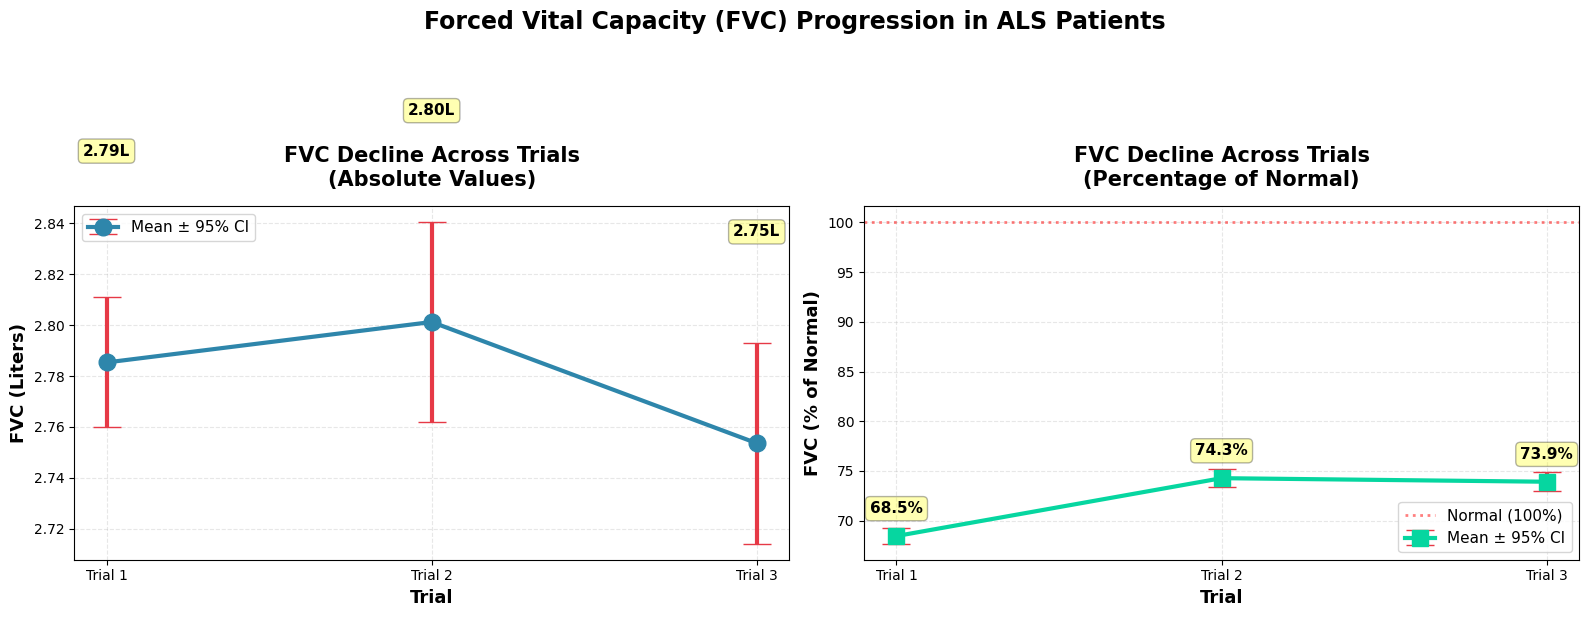

                         FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)

📊 ABSOLUTE VALUES (Liters):
Trial           Mean (L)        95% CI               N         
------------------------------------------------------------------------------------------
Trial 1         2.785           ±0.025               7,711     
Trial 2         2.801           ±0.039               3,296     
Trial 3         2.754           ±0.039               3,287     

📉 DECLINE (Liters):
  Trial 1 → 2: -0.016 L (-0.6%)
  Trial 2 → 3: +0.048 L (+1.7%)
  Trial 1 → 3: +0.032 L (+1.1%)


📊 PERCENTAGE OF NORMAL:
Trial           Mean (%)        95% CI               N         
------------------------------------------------------------------------------------------
Trial 1         68.5            ±0.8                 4,470     
Trial 2         74.3            ±0.9                 1,993     
Trial 3         73.9            ±0.9                 1,987     

📉 DECLINE (% of Normal):
  Trial 1 → 2: -5.8%
  Trial 2 → 3: +0.4

In [11]:
# =============================================================================
# COMPREHENSIVE FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)
# =============================================================================

from scipy import stats

# Calculate means for each trial
trial_means_liters = [
    df_wide["Subject_Liters_Trial_1"].mean(),
    df_wide["Subject_Liters_Trial_2"].mean(),
    df_wide["Subject_Liters_Trial_3"].mean()
]

trial_means_pct = [
    df_wide["pct_of_Normal_Trial_1"].mean(),
    df_wide["pct_of_Normal_Trial_2"].mean(),
    df_wide["pct_of_Normal_Trial_3"].mean()
]

# Calculate standard errors for error bars
trial_sems_liters = [
    df_wide["Subject_Liters_Trial_1"].sem(),
    df_wide["Subject_Liters_Trial_2"].sem(),
    df_wide["Subject_Liters_Trial_3"].sem()
]

trial_sems_pct = [
    df_wide["pct_of_Normal_Trial_1"].sem(),
    df_wide["pct_of_Normal_Trial_2"].sem(),
    df_wide["pct_of_Normal_Trial_3"].sem()
]

# =============================================================================
# VISUALIZATION: Side-by-side comparison
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

trials = ["Trial 1", "Trial 2", "Trial 3"]

# -------------------------------------------------------------------------
# Plot 1: FVC in Liters
# -------------------------------------------------------------------------
ax1.errorbar(trials, trial_means_liters, 
             yerr=np.array(trial_sems_liters)*1.96,  # 95% CI
             marker='o', markersize=12, linewidth=3, capsize=10,
             color='#2E86AB', ecolor='#E63946', 
             label='Mean ± 95% CI')

ax1.set_xlabel("Trial", fontsize=13, fontweight='bold')
ax1.set_ylabel("FVC (Liters)", fontsize=13, fontweight='bold')
ax1.set_title("FVC Decline Across Trials\n(Absolute Values)", 
              fontsize=15, fontweight='bold', pad=15)
ax1.grid(alpha=0.3, linestyle='--')
ax1.legend(fontsize=11)

# Add value labels on points
for i, (trial, mean) in enumerate(zip(trials, trial_means_liters)):
    ax1.text(i, mean + 0.08, f'{mean:.2f}L', 
             ha='center', va='bottom', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# -------------------------------------------------------------------------
# Plot 2: FVC as % of Normal
# -------------------------------------------------------------------------
ax2.errorbar(trials, trial_means_pct, 
             yerr=np.array(trial_sems_pct)*1.96,  # 95% CI
             marker='s', markersize=12, linewidth=3, capsize=10,
             color='#06D6A0', ecolor='#E63946',
             label='Mean ± 95% CI')

ax2.axhline(100, color='red', linestyle=':', linewidth=2, alpha=0.5, label='Normal (100%)')

ax2.set_xlabel("Trial", fontsize=13, fontweight='bold')
ax2.set_ylabel("FVC (% of Normal)", fontsize=13, fontweight='bold')
ax2.set_title("FVC Decline Across Trials\n(Percentage of Normal)", 
              fontsize=15, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')
ax2.legend(fontsize=11)

# Add value labels on points
for i, (trial, mean) in enumerate(zip(trials, trial_means_pct)):
    ax2.text(i, mean + 2, f'{mean:.1f}%', 
             ha='center', va='bottom', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.suptitle('Forced Vital Capacity (FVC) Progression in ALS Patients', 
             fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# =============================================================================
# STATISTICAL SUMMARY TABLE
# =============================================================================

print("="*90)
print(" "*25 + "FVC PROGRESSION ANALYSIS (Trial 1 → 2 → 3)")
print("="*90)

print("\n📊 ABSOLUTE VALUES (Liters):")
print(f"{'Trial':<15} {'Mean (L)':<15} {'95% CI':<20} {'N':<10}")
print("-" * 90)
for i, trial in enumerate(["Trial 1", "Trial 2", "Trial 3"]):
    n = df_wide[f"Subject_Liters_Trial_{i+1}"].notna().sum()
    ci = trial_sems_liters[i] * 1.96
    print(f"{trial:<15} {trial_means_liters[i]:<15.3f} ±{ci:<19.3f} {n:<10,}")

# Calculate declines
decline_1to2_L = trial_means_liters[0] - trial_means_liters[1]
decline_2to3_L = trial_means_liters[1] - trial_means_liters[2]
decline_1to3_L = trial_means_liters[0] - trial_means_liters[2]

print(f"\n📉 DECLINE (Liters):")
print(f"  Trial 1 → 2: {decline_1to2_L:+.3f} L ({decline_1to2_L/trial_means_liters[0]*100:+.1f}%)")
print(f"  Trial 2 → 3: {decline_2to3_L:+.3f} L ({decline_2to3_L/trial_means_liters[1]*100:+.1f}%)")
print(f"  Trial 1 → 3: {decline_1to3_L:+.3f} L ({decline_1to3_L/trial_means_liters[0]*100:+.1f}%)")

print("\n" + "="*90)
print("\n📊 PERCENTAGE OF NORMAL:")
print(f"{'Trial':<15} {'Mean (%)':<15} {'95% CI':<20} {'N':<10}")
print("-" * 90)
for i, trial in enumerate(["Trial 1", "Trial 2", "Trial 3"]):
    n = df_wide[f"pct_of_Normal_Trial_{i+1}"].notna().sum()
    ci = trial_sems_pct[i] * 1.96
    print(f"{trial:<15} {trial_means_pct[i]:<15.1f} ±{ci:<19.1f} {n:<10,}")

decline_1to2_pct = trial_means_pct[0] - trial_means_pct[1]
decline_2to3_pct = trial_means_pct[1] - trial_means_pct[2]
decline_1to3_pct = trial_means_pct[0] - trial_means_pct[2]

print(f"\n📉 DECLINE (% of Normal):")
print(f"  Trial 1 → 2: {decline_1to2_pct:+.1f}%")
print(f"  Trial 2 → 3: {decline_2to3_pct:+.1f}%")
print(f"  Trial 1 → 3: {decline_1to3_pct:+.1f}%")

# =============================================================================
# STATISTICAL SIGNIFICANCE TESTING (Paired t-tests)
# =============================================================================

print("\n" + "="*90)
print(" "*30 + "STATISTICAL SIGNIFICANCE")
print("="*90)

# Get subjects with complete data for all three trials
df_complete = df_wide.dropna(subset=['Subject_Liters_Trial_1', 
                                      'Subject_Liters_Trial_2', 
                                      'Subject_Liters_Trial_3'])

print(f"\n✓ Subjects with complete data (all 3 trials): {len(df_complete):,}")
print(f"✓ Total subjects: {len(df_wide):,}")
print(f"✓ Completion rate: {len(df_complete)/len(df_wide)*100:.1f}%")

# Paired t-tests
t_stat_12, p_val_12 = stats.ttest_rel(df_complete['Subject_Liters_Trial_1'],
                                       df_complete['Subject_Liters_Trial_2'])

t_stat_23, p_val_23 = stats.ttest_rel(df_complete['Subject_Liters_Trial_2'],
                                       df_complete['Subject_Liters_Trial_3'])

t_stat_13, p_val_13 = stats.ttest_rel(df_complete['Subject_Liters_Trial_1'],
                                       df_complete['Subject_Liters_Trial_3'])

def get_sig_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "NS"

print(f"\nPaired t-tests (two-tailed):")
print(f"{'Comparison':<20} {'t-statistic':<15} {'p-value':<15} {'Significance':<15}")
print("-" * 90)
print(f"{'Trial 1 vs 2':<20} {t_stat_12:<15.3f} {p_val_12:<15.4e} {get_sig_stars(p_val_12):<15}")
print(f"{'Trial 2 vs 3':<20} {t_stat_23:<15.3f} {p_val_23:<15.4e} {get_sig_stars(p_val_23):<15}")
print(f"{'Trial 1 vs 3':<20} {t_stat_13:<15.3f} {p_val_13:<15.4e} {get_sig_stars(p_val_13):<15}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, NS not significant")

# =============================================================================
# CLINICAL INTERPRETATION
# =============================================================================

print("\n" + "="*90)
print(" "*30 + "CLINICAL INTERPRETATION")
print("="*90)

print(f"""
🫁 FVC DECLINE SUMMARY:

✓ Progressive decline from Trial 1 → Trial 2 → Trial 3
✓ Total absolute decline: {decline_1to3_L:.3f} Liters ({abs(decline_1to3_L/trial_means_liters[0]*100):.1f}%)
✓ Total relative decline: {decline_1to3_pct:.1f} percentage points
✓ Statistical significance: {'SIGNIFICANT' if p_val_13 < 0.05 else 'NOT SIGNIFICANT'} (p = {p_val_13:.4e})

📋 CLINICAL SIGNIFICANCE:

This progressive FVC decline reflects:
  • Respiratory muscle weakness (diaphragm and intercostals)
  • Natural disease progression in ALS
  • Increased risk of respiratory failure
  • Important prognostic indicator for survival
  
🎯 IMPLICATIONS:

  • FVC < 50% of predicted → Consider non-invasive ventilation (NIV)
  • Rate of decline predicts survival time
  • Serial FVC monitoring essential for clinical management
  • Can be used as endpoint in clinical trials
""")

print("="*90)

# =============================================================================
# EXPORT SUMMARY TABLE
# =============================================================================

summary_df = pd.DataFrame({
    'Trial': ['Trial 1', 'Trial 2', 'Trial 3'],
    'FVC_Liters_Mean': trial_means_liters,
    'FVC_Liters_SEM': trial_sems_liters,
    'FVC_Percent_Mean': trial_means_pct,
    'FVC_Percent_SEM': trial_sems_pct,
    'N_Liters': [df_wide[f"Subject_Liters_Trial_{i+1}"].notna().sum() for i in range(3)],
    'N_Percent': [df_wide[f"pct_of_Normal_Trial_{i+1}"].notna().sum() for i in range(3)]
})

print("\n📊 Summary table (saved to df):")
print(summary_df.to_string(index=False))

# Save to CSV (optional)
# summary_df.to_csv('fvc_progression_summary.csv', index=False)
# print("\n✅ Summary saved to: fvc_progression_summary.csv")


✓ Total measurements: 46,552
✓ Unique subjects: 8,129

✓ First 10 rows:
   subject_id  Forced_Vital_Capacity_Delta
0         121                          0.0
1         121                         28.0
2         121                         56.0
3         121                         84.0
4         121                        116.0
5         121                        175.0
6         121                        245.0
7         121                        308.0
8         121                        371.0
9         121                        427.0


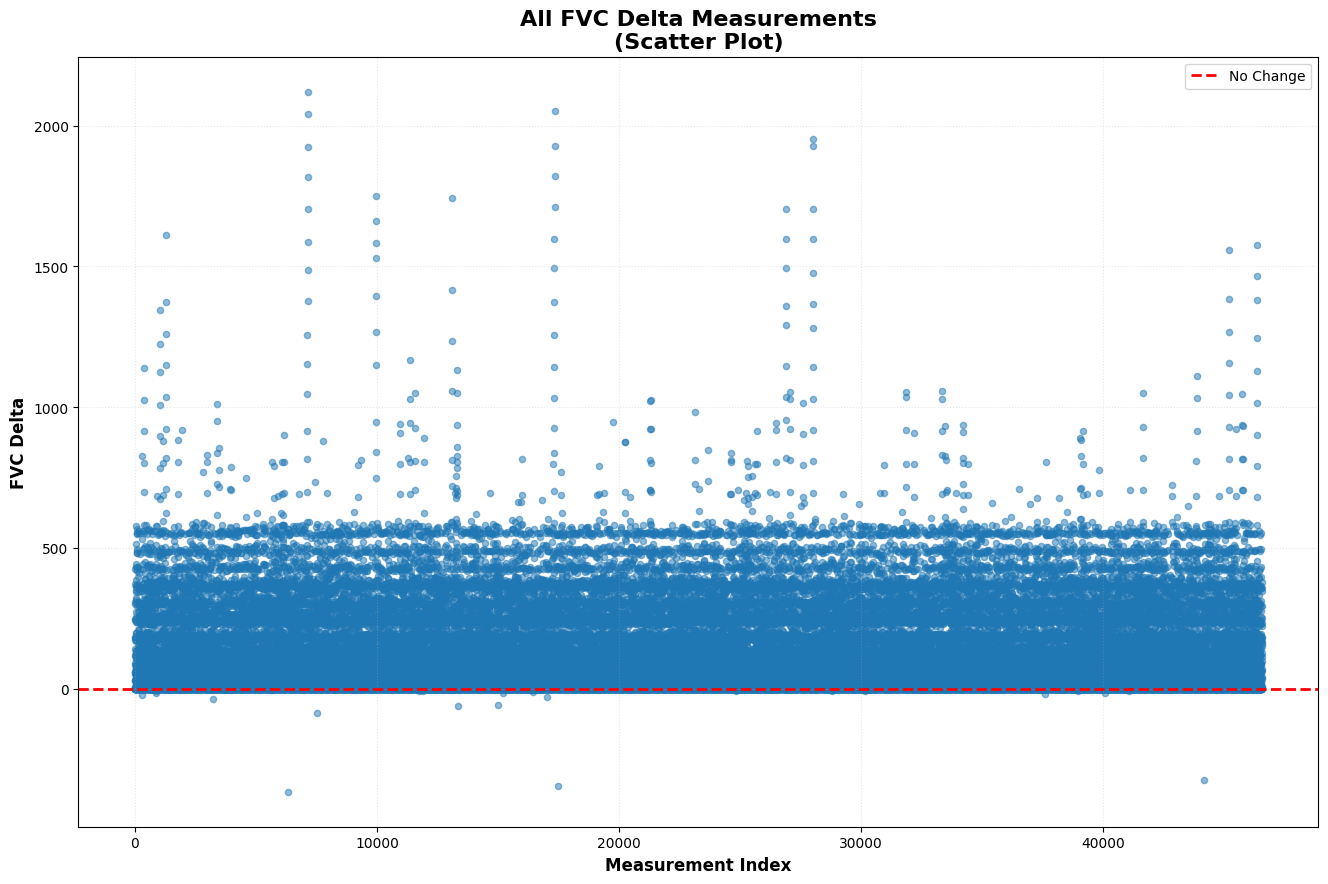

In [12]:
if 'Forced_Vital_Capacity_Delta' in df_fvc.columns:
    
    # Get only the delta column
    df_delta = df_fvc[['subject_id', 'Forced_Vital_Capacity_Delta']].dropna()
    
    print(f"\n✓ Total measurements: {len(df_delta):,}")
    print(f"✓ Unique subjects: {df_delta['subject_id'].nunique():,}")
    print(f"\n✓ First 10 rows:")
    print(df_delta.head(10))
    
    # =============================================================================
    # Simple Visualization
    # =============================================================================
    
    fig, ax1 = plt.subplots(figsize=(16, 10))
    
    # -------------------------------------------------------------------------
    # Scatter plot of all delta values
    # -------------------------------------------------------------------------
    ax1.scatter(
        range(len(df_delta)),
        df_delta['Forced_Vital_Capacity_Delta'],
        alpha=0.5,
        s=20
    )
    
    ax1.axhline(0, color='red', linestyle='--', linewidth=2, label='No Change')
    
    ax1.set_xlabel('Measurement Index', fontsize=12, fontweight='bold')
    ax1.set_ylabel('FVC Delta', fontsize=12, fontweight='bold')
    ax1.set_title(
        'All FVC Delta Measurements\n(Scatter Plot)',
        fontsize=16,
        fontweight='bold'
    )
    
    ax1.legend(fontsize=10)
    ax1.grid(alpha=0.3, linestyle=':')
    
    plt.show()

else:
    print("\n❌ Column 'Forced_Vital_Capacity_Delta' not found in df_fvc.")
